In [12]:
# eda_plots.py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA
import numpy as np

# === 1. 类别目标分布 ===
def plot_class_distribution(df, target, outdir):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=target, data=df)
    plt.title("Class Distribution")
    plt.savefig(Path(outdir) / "01_class_distribution.png", dpi=200, bbox_inches="tight")
    plt.close()

# === 2. 缺失值可视化 ===
def plot_missingness_bar(df, outdir):
    plt.figure(figsize=(8, 4))
    missing = df.isnull().mean() * 100
    sns.barplot(x=missing.index, y=missing.values)
    plt.xticks(rotation=45, ha="right")
    plt.title("Missing Value Percentage by Column")
    plt.ylabel("% Missing")
    plt.savefig(Path(outdir) / "02_missingness.png", dpi=200, bbox_inches="tight")
    plt.close()
                
# === 3. 数值变量直方图 ===
def plot_numeric_histograms(df, outdir, bins=20, target=None):
    numeric_cols = df.select_dtypes(include="number").columns
    for col in numeric_cols:
        plt.figure(figsize=(5, 3))
        sns.histplot(df[col], bins=bins, kde=True)
        plt.title(f"Distribution of {col}")
        plt.savefig(Path(outdir) / f"10_hist_{col}.png", dpi=200, bbox_inches="tight")
        plt.close()

# === 4. 相关矩阵热力图 ===
def plot_corr_heatmap(df, outdir):
    plt.figure(figsize=(10, 8))
    corr = df.select_dtypes(include="number").corr()
    sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
    plt.title("Correlation Heatmap")
    plt.savefig(Path(outdir) / "20_corr_heatmap.png", dpi=200, bbox_inches="tight")
    plt.close()


# === 5. 箱线图按目标分组 ===
def plot_boxplots_by_target(df, target, outdir):
    numeric_cols = df.select_dtypes(include="number").columns
    for col in numeric_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=target, y=col, data=df)
        plt.title(f"{col} by {target}")
        plt.savefig(Path(outdir) / f"30_box_{col}.png", dpi=200, bbox_inches="tight")
        plt.close()

# === 6. 分类变量堆叠条形图 ===
def plot_stacked_bar_categoricals(df, target, outdir):
    cat_cols = df.select_dtypes(include="object").columns
    for col in cat_cols:
        tab = pd.crosstab(df[col], df[target], normalize="index")
        tab.plot(kind="bar", stacked=True, figsize=(6, 4), colormap="tab10")
        plt.title(f"{col} vs {target}")
        plt.ylabel("Proportion")
        plt.savefig(Path(outdir) / f"40_stacked_{col}.png", dpi=200, bbox_inches="tight")
        plt.close()

# === 7. 数值特征散点矩阵 ===
def plot_scatter_matrix_small(df, outdir, target=None, max_vars=4):
    num_cols = df.select_dtypes(include="number").columns[:max_vars]
    sns.pairplot(df[num_cols.tolist() + ([target] if target else [])], hue=target)
    plt.savefig(Path(outdir) / "50_scatter_matrix.png", dpi=200, bbox_inches="tight")
    plt.close()

# === 8. PCA降维散点 ===
def plot_pca_scatter(df, target, outdir, n_components=2):
    num_df = df.select_dtypes(include="number")
    if target in df.columns:
        valid_idx = df[target].notna() & num_df.notna().all(axis=1)
        num_df = num_df.loc[valid_idx]
        y = df.loc[valid_idx, target]
    else:
        num_df = num_df.dropna()
        y = None


    pca = PCA(n_components=n_components)
    Z = pca.fit_transform(num_df)

    if n_components == 2:
        plt.figure(figsize=(7, 6))
        if y is not None:
            sns.scatterplot(x=Z[:, 0], y=Z[:, 1], hue=y)
        else:
            plt.scatter(Z[:, 0], Z[:, 1])
        plt.title("PCA 2D Scatter")
        plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
        plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
        plt.savefig(Path(outdir) / "60_pca2.png", dpi=200, bbox_inches="tight")
        plt.close()

# === 9. 一键运行所有EDA函数 ===
def run_all(csv_path, target="diagnosis", outdir="eda_figs"):
    Path(outdir).mkdir(exist_ok=True)
    df = pd.read_csv(csv_path)
    plot_class_distribution(df, target, outdir)
    plot_missingness_bar(df, outdir)
    plot_numeric_histograms(df, outdir)
    plot_corr_heatmap(df, outdir)
    plot_boxplots_by_target(df, target, outdir)
    plot_stacked_bar_categoricals(df, target, outdir)
    plot_scatter_matrix_small(df, outdir, target)
    plot_pca_scatter(df, target, outdir)


In [13]:
# --- inline EDA plotting functions ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA
import numpy as np


In [14]:
df = pd.read_csv("group_3-2.csv")
target = "diagnosis"
outdir = "eda_figs"


In [15]:
Path(outdir).mkdir(exist_ok=True)  # 确保输出文件夹存在

plot_class_distribution(df, target, outdir)
plot_missingness_bar(df, outdir)
plot_numeric_histograms(df, outdir, bins=20)
plot_corr_heatmap(df, outdir)
plot_boxplots_by_target(df, target, outdir)
plot_stacked_bar_categoricals(df, target, outdir)
plot_scatter_matrix_small(df, outdir, target)
plot_pca_scatter(df, target, outdir, n_components=2)

In [16]:
from PIL import Image
import os

# 图像文件夹
folder = "eda_figs"

# 获取所有 PNG 文件路径
files = sorted([os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(".png")])

# 打开所有图片
images = [Image.open(f).convert("RGB") for f in files]

# 合并成一个 PDF
output_path = "EDA_Report.pdf"
if images:
    images[0].save(output_path, save_all=True, append_images=images[1:])
    print(f"✅ 已保存为 {output_path}")
else:
    print("❌ 没有找到 PNG 文件")


✅ 已保存为 EDA_Report.pdf


In [18]:
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

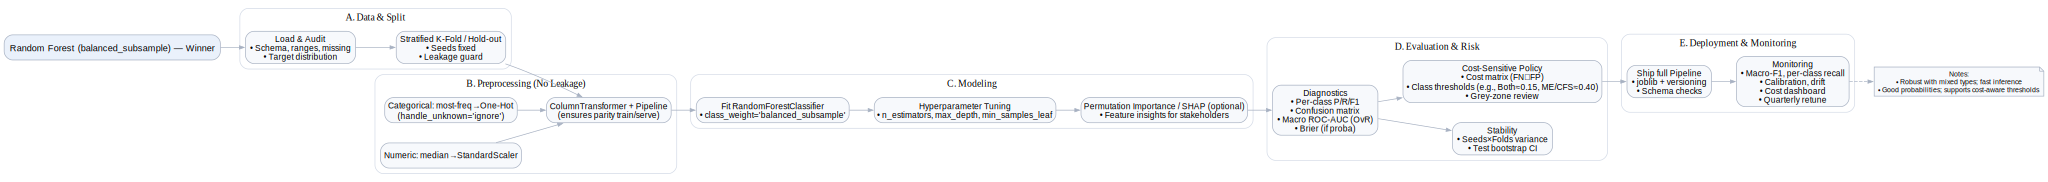

Saved charts:
- logreg: SVG=flowcharts/logreg.svg | PNG=flowcharts/logreg.png
- linsvm: SVG=flowcharts/linsvm.svg | PNG=flowcharts/linsvm.png
- knn: SVG=flowcharts/knn.svg | PNG=flowcharts/knn.png
- rf: SVG=flowcharts/rf.svg | PNG=flowcharts/rf.png
- gb: SVG=flowcharts/gb.svg | PNG=flowcharts/gb.png


In [21]:
# Generate separate, good-looking flowcharts (one per model) with Graphviz.
# Saves both SVG & PNG to /mnt/data/flowcharts/

from graphviz import Digraph
from pathlib import Path
from IPython.display import SVG, display

out_dir = Path("flowcharts")
out_dir.mkdir(parents=True, exist_ok=True)

def make_chart(model_key: str, title: str, model_specific_nodes: list, notes: list):
    g = Digraph(model_key, format="svg")
    g.attr(rankdir="LR", splines="spline", nodesep="0.4", ranksep="0.5")
    g.attr("node", shape="box", style="rounded,filled", fillcolor="#F7F9FC",
           color="#A7B1C2", fontname="Helvetica", fontsize="12")
    g.attr("edge", color="#A7B1C2", arrowsize="0.7")

    # Header
    g.node("H", title, shape="box", style="rounded,filled",
           fillcolor="#EAF1FB", fontsize="13")

    # A. Data & Split
    with g.subgraph(name=f"cluster_A_{model_key}") as c:
        c.attr(label="A. Data & Split", color="#D3DAE6", style="rounded")
        c.node("A1", "Load & Audit\n• Schema, ranges, missing\n• Target distribution")
        c.node("A2", "Stratified K-Fold / Hold-out\n• Seeds fixed\n• Leakage guard")
        c.edges([("A1", "A2")])

    # B. Preprocessing (No Leakage)
    with g.subgraph(name=f"cluster_B_{model_key}") as c:
        c.attr(label="B. Preprocessing (No Leakage)", color="#D3DAE6", style="rounded")
        c.node("B1", "Numeric: median→StandardScaler")
        c.node("B2", "Categorical: most-freq→One-Hot\n(handle_unknown='ignore')")
        c.node("B3", "ColumnTransformer + Pipeline\n(ensures parity train/serve)")
        c.edges([("B1", "B3"), ("B2", "B3")])

    # C. Modeling (model-specific)
    with g.subgraph(name=f"cluster_C_{model_key}") as c:
        c.attr(label="C. Modeling", color="#D3DAE6", style="rounded")
        prev = None
        for i, node_text in enumerate(model_specific_nodes, start=1):
            nid = f"C{i}"
            c.node(nid, node_text)
            if prev:
                c.edge(prev, nid)
            prev = nid

    # D. Evaluation & Risk
    with g.subgraph(name=f"cluster_D_{model_key}") as c:
        c.attr(label="D. Evaluation & Risk", color="#D3DAE6", style="rounded")
        c.node("D1", "Diagnostics\n• Per-class P/R/F1\n• Confusion matrix\n• Macro ROC-AUC (OvR)\n• Brier (if proba)")
        c.node("D2", "Stability\n• Seeds×Folds variance\n• Test bootstrap CI")
        c.node("D3", "Cost-Sensitive Policy\n• Cost matrix (FN≫FP)\n• Class thresholds (e.g., Both≈0.15, ME/CFS≈0.40)\n• Grey-zone review")
        c.edges([("D1", "D2"), ("D1", "D3")])

    # E. Deployment & Monitoring
    with g.subgraph(name=f"cluster_E_{model_key}") as c:
        c.attr(label="E. Deployment & Monitoring", color="#D3DAE6", style="rounded")
        c.node("E1", "Ship full Pipeline\n• joblib + versioning\n• Schema checks")
        c.node("E2", "Monitoring\n• Macro-F1, per-class recall\n• Calibration, drift\n• Cost dashboard\n• Quarterly retune")
        c.edges([("E1", "E2")])

    # Flow edges
    g.edge("H", "A1")
    g.edge("A2", "B3")
    g.edge("B3", "C1")
    g.edge("C" + str(len(model_specific_nodes)), "D1")
    g.edge("D3", "E1")

    # Optional notes
    if notes:
        g.node("N", "Notes:\n• " + "\n• ".join(notes),
               shape="note", color="#A7B1C2", fontsize="10")
        g.edge("E2", "N", style="dashed")

    svg_path = out_dir / f"{model_key}.svg"
    png_path = out_dir / f"{model_key}.png"
    g.render(svg_path.with_suffix(""), format="svg", cleanup=True)
    g_png = g.copy(); g_png.format = "png"
    g_png.render(png_path.with_suffix(""), format="png", cleanup=True)
    return svg_path, png_path

# === Define model-specific steps ===

# 1) Logistic Regression (multinomial, balanced)
logreg = make_chart(
    "logreg",
    "Logistic Regression (Multinomial, class_weight='balanced')",
    model_specific_nodes=[
        "Fit LogisticRegression\n• solver='lbfgs'\n• multi_class='multinomial'\n• class_weight='balanced'",
        "Hyperparameter Tuning\n• Grid on C, penalty (l2)\n• CV macro-F1",
        "Calibrate (optional)\n• if needed for better Brier"
    ],
    notes=[
        "Coefficients support directional interpretation",
        "Watch multicollinearity; use regularization"
    ]
)

# 2) Linear SVM + Calibration
linsvm = make_chart(
    "linsvm",
    "Linear SVM (Calibrated)",
    model_specific_nodes=[
        "Fit LinearSVC\n• class_weight='balanced'",
        "Probability Calibration\n• CalibratedClassifierCV(method='sigmoid', cv=3)",
        "Hyperparameter Tuning\n• C grid on wrapped pipeline\n• CV macro-F1"
    ],
    notes=[
        "Use calibrated proba for ROC/Brier/thresholding",
        "Good large-margin baseline"
    ]
)

# 3) kNN (with optional SVD for high-dim OHE)
knn = make_chart(
    "knn",
    "k-Nearest Neighbors",
    model_specific_nodes=[
        "Scale + One-Hot in Pipeline (already)",
        "Optional Dimensionality Step\n• TruncatedSVD(n_components≈30-80)",
        "Fit KNeighborsClassifier\n• search k, weights, p (1/2) with CV"
    ],
    notes=[
        "Distance-based; sensitive to scaling",
        "SVD helps when OHE becomes very high-dim"
    ]
)

# 4) Random Forest (winner)
rf = make_chart(
    "rf",
    "Random Forest (balanced_subsample) — Winner",
    model_specific_nodes=[
        "Fit RandomForestClassifier\n• class_weight='balanced_subsample'",
        "Hyperparameter Tuning\n• n_estimators, max_depth, min_samples_leaf",
        "Permutation Importance / SHAP (optional)\n• Feature insights for stakeholders"
    ],
    notes=[
        "Robust with mixed types; fast inference",
        "Good probabilities; supports cost-aware thresholds"
    ]
)

# 5) Gradient Boosting
gb = make_chart(
    "gb",
    "Gradient Boosting (GB)",
    model_specific_nodes=[
        "Fit GradientBoostingClassifier",
        "Hyperparameter Tuning\n• n_estimators, learning_rate, max_depth",
        "Calibration (optional)\n• Platt/Isotonic if needed"
    ],
    notes=[
        "Often strong; may need calibration for probabilities",
        "Check overfitting via learning curves"
    ]
)

# === Preview one inline (optional) ===
display(SVG(filename=str(rf[0])))

print("Saved charts:")
for name, paths in {"logreg":logreg, "linsvm":linsvm, "knn":knn, "rf":rf, "gb":gb}.items():
    print(f"- {name}: SVG={paths[0]} | PNG={paths[1]}")
